#**Install Library**

In [1]:
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 53.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Importing Libraries

import pandas as pd
import geopandas as gpd
import numpy as np
from pysal.lib import weights
from splot.libpysal import plot_spatial_weights
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, plot_local_autocorrelation, lisa_cluster
import matplotlib.pyplot as plt
import folium
import matplotlib.colors as colors


import warnings
warnings.filterwarnings("ignore")

#**Load Dataset**

In [3]:
# Loading data
census_tract_sp = gpd.GeoDataFrame.from_file(r'https://github.com/AlvaroMatsuda/medium_posts/blob/main/spatial_autocorrelation/data/census_tract_sp.geojson?raw=true')
census_tract_sp.head()

,id,cd_geocodi,tipo,cd_geocods,nm_subdist,cd_geocodd,nm_distrit,cd_geocodm,nm_municip,nm_micro,nm_meso,cd_geocodb,nm_bairro,pop_count,total_monthly_income,geometry
0,109347.0,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,266.0,432103.0,"POLYGON ((-46.51779 -23.57947, -46.51786 -23.5..."
1,109348.0,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,330.0,449239.0,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5..."
2,109349.0,355030804000081,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,320.0,411373.0,"POLYGON ((-46.52015 -23.58105, -46.52026 -23.5..."
3,109350.0,355030804000082,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,424.0,629889.0,"POLYGON ((-46.52140 -23.57992, -46.52144 -23.5..."
4,109351.0,355030804000083,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,303.0,320125.0,"POLYGON ((-46.52371 -23.58185, -46.52384 -23.5..."


In [4]:
census_tract_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18953 entries, 0 to 18952
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    18953 non-null  float64 
 1   cd_geocodi            18953 non-null  object  
 2   tipo                  18953 non-null  object  
 3   cd_geocods            18953 non-null  object  
 4   nm_subdist            0 non-null      object  
 5   cd_geocodd            18953 non-null  object  
 6   nm_distrit            18953 non-null  object  
 7   cd_geocodm            18953 non-null  object  
 8   nm_municip            18953 non-null  object  
 9   nm_micro              18953 non-null  object  
 10  nm_meso               18953 non-null  object  
 11  cd_geocodb            0 non-null      object  
 12  nm_bairro             0 non-null      object  
 13  pop_count             18363 non-null  float64 
 14  total_monthly_income  18363 non-null  float64 

In [5]:
# Fillna of pop_count and total_monthly_income
census_tract_sp['total_monthly_income'].fillna(0, inplace=True)
census_tract_sp['pop_count'].fillna(0, inplace=True)

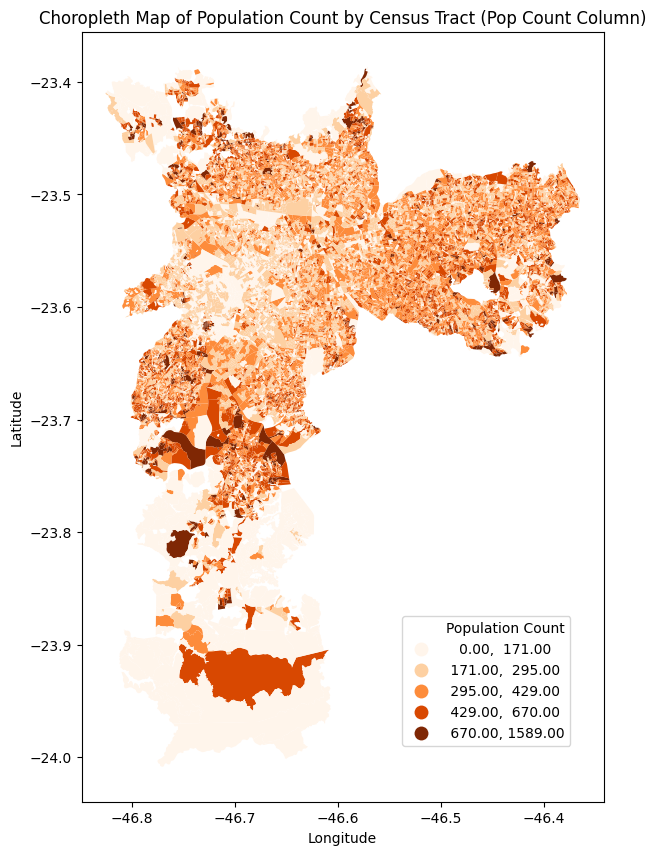

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load your GeoDataFrame (census_tract_sp) from a GeoJSON file
url = 'https://github.com/AlvaroMatsuda/medium_posts/blob/main/spatial_autocorrelation/data/census_tract_sp.geojson?raw=true'
census_tract_sp = gpd.read_file(url)

# Plotting choropleth map of pop_count column
ax = census_tract_sp.plot(column='pop_count', cmap='Oranges', scheme='naturalbreaks', legend=True, figsize=(10, 10))
leg = ax.get_legend().set_title('Population Count')
leg = ax.get_legend().set_bbox_to_anchor((0.95, 0.25))
leg = ax.get_legend()._legend_box.align = "right"

# Add title and labels
ax.set_title('Choropleth Map of Population Count by Census Tract (Pop Count Column)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

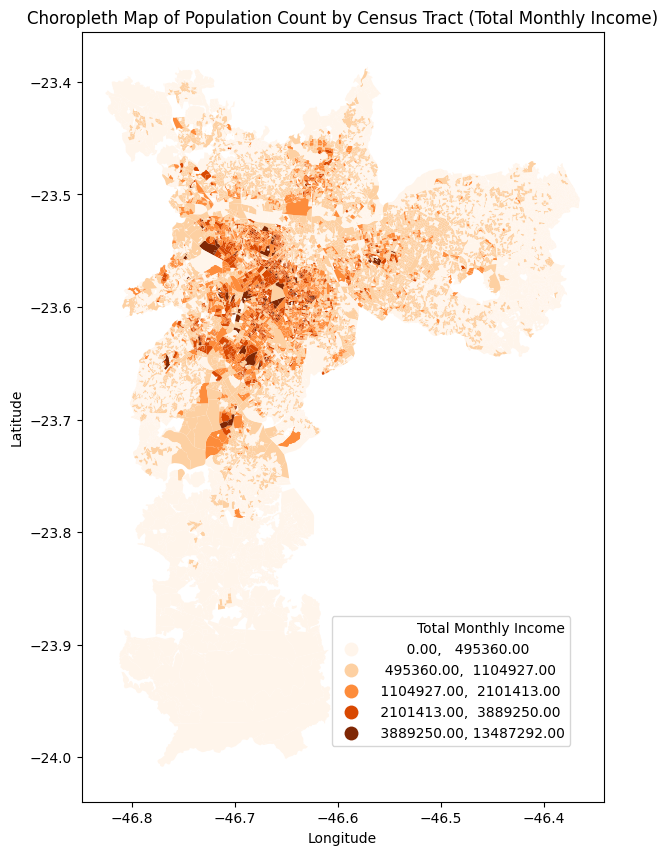

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load your GeoDataFrame (census_tract_sp) from a GeoJSON file
url = 'https://github.com/AlvaroMatsuda/medium_posts/blob/main/spatial_autocorrelation/data/census_tract_sp.geojson?raw=true'
census_tract_sp = gpd.read_file(url)

# Plotting choropleth map of pop_count column
ax = census_tract_sp.plot(column='total_monthly_income', cmap='Oranges', scheme='naturalbreaks', legend=True, figsize=(10, 10))
leg = ax.get_legend().set_title('Total Monthly Income')
leg = ax.get_legend().set_bbox_to_anchor((0.95, 0.25))
leg = ax.get_legend()._legend_box.align = "right"

# Add title and labels
ax.set_title('Choropleth Map of Population Count by Census Tract (Total Monthly Income)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

#**Spatial Weights and Spatial Lag**

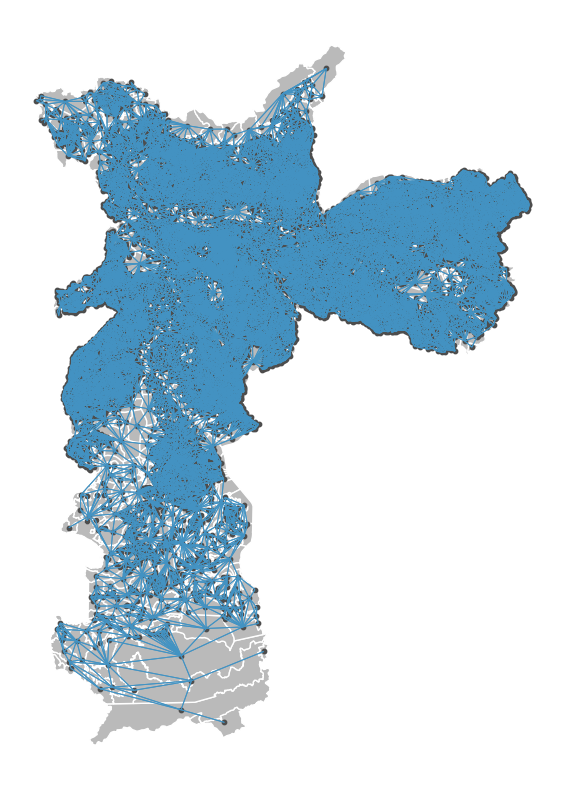

In [8]:
# Building spatial weights object
w = weights.contiguity.Queen.from_dataframe(census_tract_sp)

# Plotting to visualize spatial weights
plot_spatial_weights(w, census_tract_sp);

In [9]:
# Transforming weights into binary (if it's 1 = is neighbor, 0 = not neighbor)
w.transform = "B"

# Showing neighbors indexes
w.neighbors

{0: [1, 450, 456, 429, 431],
 1: [0, 432, 450, 2, 3, 456, 431],
 2: [456, 1, 3],
 3: [432, 1, 2, 433, 4, 456, 457],
 4: [480, 433, 3, 13783, 13784, 457],
 5: [434, 6, 7, 475, 16939],
 6: [5, 7, 16904, 16938, 16939, 16940, 16876, 16979, 16980, 16981, 16917],
 7: [435, 436, 5, 6, 16917, 3225, 475],
 8: [14720, 9, 10, 11, 461, 444, 445, 14719],
 9: [8, 10, 11, 461],
 10: [8, 9, 11, 12, 445, 476, 447],
 11: [8, 9, 10, 12, 461],
 12: [10, 11, 476, 461, 462],
 13: [451, 476, 453, 447],
 14: [451, 476, 463],
 15: [1035],
 16: [1035],
 17: [1249, 18, 1019, 1244, 1007],
 18: [1249, 1250, 1059, 1061, 17, 19, 1207, 1019],
 19: [18, 1019, 1250, 20],
 20: [1296, 1250, 19, 21, 1208, 1019],
 21: [1296, 1202, 1330, 1252, 20, 23, 1208],
 22: [1251, 1252, 1334, 23, 1064],
 23: [1330, 1251, 1252, 1202, 21, 22, 1211],
 24: [1202, 1203, 1204, 25, 1210],
 25: [24, 1209, 1202, 1210],
 26: [1027, 1077, 1080, 28, 1325, 1326],
 27: [1040, 1041, 1027, 1028, 1080, 28],
 28: [1080, 27, 26, 1027],
 29: [1165],
 30:

In [10]:
# Showing weights
w.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0],
 15: [1.0],
 16: [1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0],
 29: [1.0],
 30: [1.0],
 31

In [37]:
# Calculating Spatial Lag
census_tract_sp['w_pop_count'] = weights.lag_spatial(w, census_tract_sp['pop_count'])
census_tract_sp['w_total_monthly_income'] = weights.lag_spatial(w, census_tract_sp['total_monthly_income'])

# Check the first few rows to verify the calculations
census_tract_sp[['id', 'pop_count', 'w_pop_count', 'total_monthly_income', 'w_total_monthly_income']].head()


,id,pop_count,w_pop_count,total_monthly_income,w_total_monthly_income
0,109347.0,266.0,375.200000,432103.0,532993.400000
1,109348.0,330.0,385.428571,449239.0,536895.142857
2,109349.0,320.0,374.333333,411373.0,548633.333333
3,109350.0,424.0,353.142857,629889.0,421520.571429
4,109351.0,303.0,339.833333,320125.0,406077.500000


In [41]:
import libpysal.weights as lp

# Create spatial weights matrix
w = lp.Queen.from_dataframe(census_tract_sp)

# Calculate spatial lag for the 'pop_count' column
census_tract_sp['w_pop_count'] = lp.lag_spatial(w, census_tract_sp['pop_count'])

# Print the first few rows to verify
print(census_tract_sp[['id', 'pop_count', 'w_pop_count']].head())


         id  pop_count  w_pop_count
0  109347.0      266.0       1876.0
1  109348.0      330.0       2698.0
2  109349.0      320.0       1123.0
3  109350.0      424.0       2472.0
4  109351.0      303.0       2039.0


#**Global Spatial Autocorrelation**

In [42]:
# Menghilangkan nilai yang hilang
census_tract_sp = census_tract_sp.dropna(subset=['pop_count'])

# Membuat matriks bobot spasial
w = lp.Queen.from_dataframe(census_tract_sp)

# Menghitung Moran's I
y_pop_count = census_tract_sp['pop_count']
moran = Moran(y_pop_count, w)

# Mencetak hasil Moran's I
print("Moran's I:", moran.I)

('WARNING: ', 1197, ' is an island (no neighbors)')
('WARNING: ', 1198, ' is an island (no neighbors)')
('WARNING: ', 1199, ' is an island (no neighbors)')
('WARNING: ', 1201, ' is an island (no neighbors)')
('WARNING: ', 2448, ' is an island (no neighbors)')
('WARNING: ', 2449, ' is an island (no neighbors)')
('WARNING: ', 2450, ' is an island (no neighbors)')
('WARNING: ', 7027, ' is an island (no neighbors)')
('WARNING: ', 7028, ' is an island (no neighbors)')
('WARNING: ', 7985, ' is an island (no neighbors)')
('WARNING: ', 8146, ' is an island (no neighbors)')
('WARNING: ', 8147, ' is an island (no neighbors)')
('WARNING: ', 8148, ' is an island (no neighbors)')
('WARNING: ', 8149, ' is an island (no neighbors)')
('WARNING: ', 8150, ' is an island (no neighbors)')
('WARNING: ', 8151, ' is an island (no neighbors)')
('WARNING: ', 8152, ' is an island (no neighbors)')
('WARNING: ', 8153, ' is an island (no neighbors)')
('WARNING: ', 8154, ' is an island (no neighbors)')
('WARNING: '

In [43]:
moran.p_sim

0.001

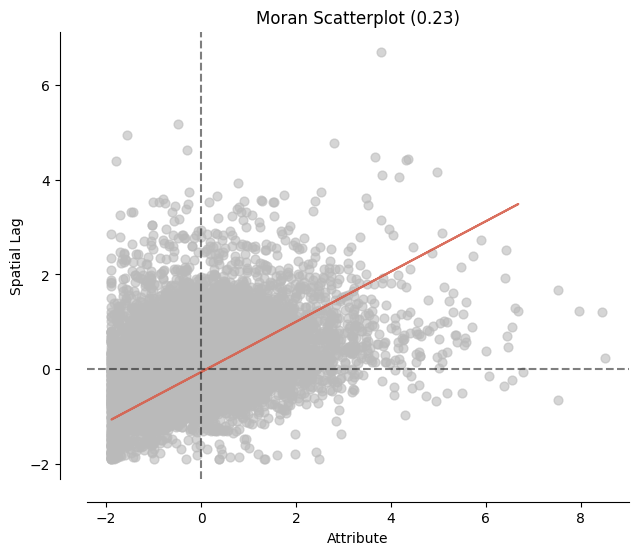

In [44]:
# Plotting Moran's I scatter plot
moran_scatterplot(moran);

In [45]:
# Menghilangkan nilai yang hilang
census_tract_sp = census_tract_sp.dropna(subset=['total_monthly_income'])

# Membuat matriks bobot spasial
w = lp.Queen.from_dataframe(census_tract_sp)

# Menghitung Moran's I
y_pop_count = census_tract_sp['total_monthly_income']
moran = Moran(y_pop_count, w)

# Mencetak hasil Moran's I
print("Moran's I:", moran.I)

('WARNING: ', 1197, ' is an island (no neighbors)')
('WARNING: ', 1198, ' is an island (no neighbors)')
('WARNING: ', 1199, ' is an island (no neighbors)')
('WARNING: ', 1201, ' is an island (no neighbors)')
('WARNING: ', 2448, ' is an island (no neighbors)')
('WARNING: ', 2449, ' is an island (no neighbors)')
('WARNING: ', 2450, ' is an island (no neighbors)')
('WARNING: ', 7027, ' is an island (no neighbors)')
('WARNING: ', 7028, ' is an island (no neighbors)')
('WARNING: ', 7985, ' is an island (no neighbors)')
('WARNING: ', 8146, ' is an island (no neighbors)')
('WARNING: ', 8147, ' is an island (no neighbors)')
('WARNING: ', 8148, ' is an island (no neighbors)')
('WARNING: ', 8149, ' is an island (no neighbors)')
('WARNING: ', 8150, ' is an island (no neighbors)')
('WARNING: ', 8151, ' is an island (no neighbors)')
('WARNING: ', 8152, ' is an island (no neighbors)')
('WARNING: ', 8153, ' is an island (no neighbors)')
('WARNING: ', 8154, ' is an island (no neighbors)')
('WARNING: '

In [46]:
moran.p_sim

0.001

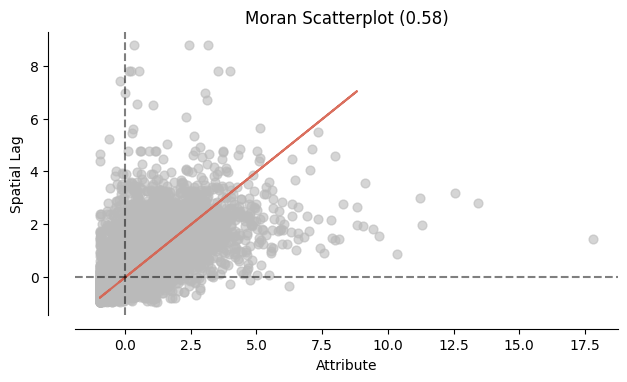

In [47]:
# Plotting Moran's I scatter plot
moran_scatterplot(moran);

#**Local Spatial Autocorrelation**

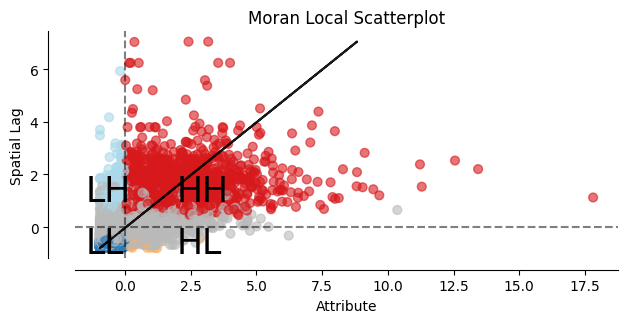

In [48]:
# Local Moran's I
pop_count_local_moran = Moran_Local(y_pop_count, w)

# Plotting Local Moran's I scatterplot of pop_count
fig, ax = moran_scatterplot(pop_count_local_moran, p=0.05);

plt.text(1.95, 1, 'HH', fontsize=25)
plt.text(1.95, -1.0, 'HL', fontsize=25)
plt.text(-1.5, 1, 'LH', fontsize=25)
plt.text(-1.5, -1, 'LL', fontsize=25)
plt.show()

In [49]:
# creating column with local_moran classification
census_tract_sp['pop_count_local_moran'] = pop_count_local_moran.q

# Dict to map local moran's classification codes
local_moran_classification = {1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'}

# Mapping local moran's classification codes
census_tract_sp['pop_count_local_moran'] = census_tract_sp['pop_count_local_moran'].map(local_moran_classification)

# p-value for each observation/neighbor pair
census_tract_sp['pop_count_local_moran_p_sim'] = pop_count_local_moran.p_sim

# If p-value > 0.05 it is not statistical significant
census_tract_sp['pop_count_local_moran'] = np.where(census_tract_sp['pop_count_local_moran_p_sim'] > 0.05, 'ns', census_tract_sp['pop_count_local_moran'])

census_tract_sp.head()

,id,cd_geocodi,tipo,cd_geocods,nm_subdist,cd_geocodd,nm_distrit,cd_geocodm,nm_municip,nm_micro,nm_meso,cd_geocodb,nm_bairro,pop_count,total_monthly_income,geometry,w_pop_count,pop_count_local_moran,pop_count_local_moran_p_sim
0,109347.0,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,266.0,432103.0,"POLYGON ((-46.51779 -23.57947, -46.51786 -23.5...",1876.0,ns,0.349
1,109348.0,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,330.0,449239.0,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5...",2698.0,ns,0.306
2,109349.0,355030804000081,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,320.0,411373.0,"POLYGON ((-46.52015 -23.58105, -46.52026 -23.5...",1123.0,ns,0.450
3,109350.0,355030804000082,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,424.0,629889.0,"POLYGON ((-46.52140 -23.57992, -46.52144 -23.5...",2472.0,ns,0.139
4,109351.0,355030804000083,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,303.0,320125.0,"POLYGON ((-46.52371 -23.58185, -46.52384 -23.5...",2039.0,ns,0.150


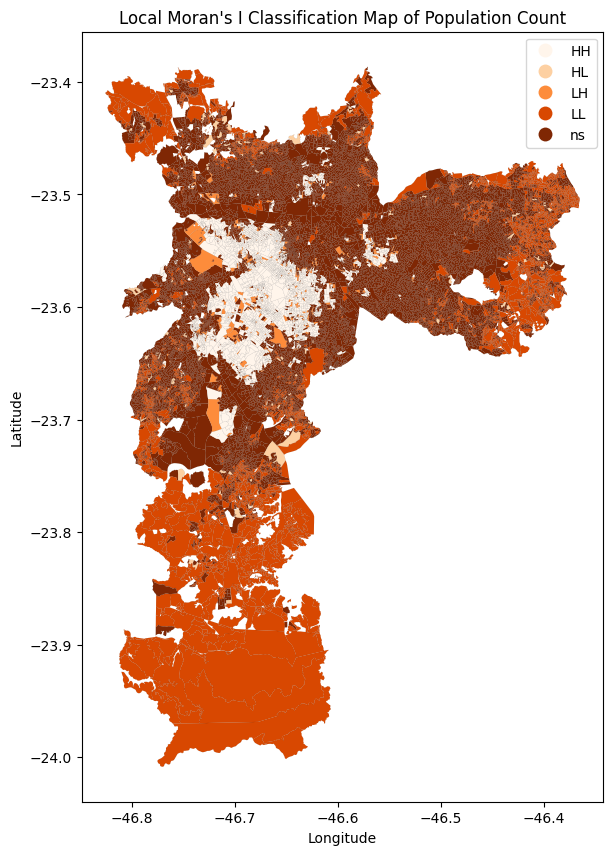

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plotting Local Moran's I classification map of pop_count column
fig, ax = plt.subplots(figsize=(10, 10))
census_tract_sp.plot(column='pop_count_local_moran', cmap='Oranges', legend=True, linewidth=0.03, edgecolor='k', ax=ax)

# Add title and labels
ax.set_title("Local Moran's I Classification Map of Population Count")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


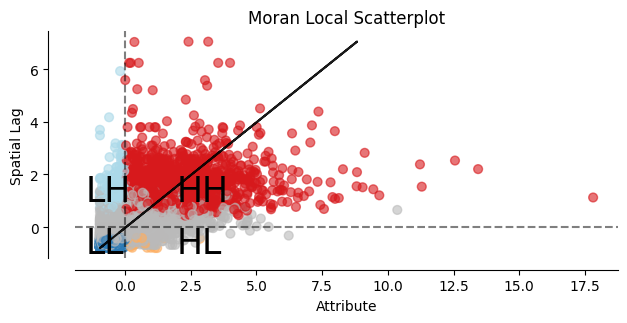

In [51]:
# Local Moran's I
total_monthly_income_local_moran = Moran_Local(y_total_monthly_income, w)

# Plotting Local Moran's I scatterplot of pop_count
fig, ax = moran_scatterplot(total_monthly_income_local_moran, p=0.05);

plt.text(1.95, 1, 'HH', fontsize=25)
plt.text(1.95, -1.0, 'HL', fontsize=25)
plt.text(-1.5, 1, 'LH', fontsize=25)
plt.text(-1.5, -1, 'LL', fontsize=25)
plt.show()

In [52]:
# creating column with local_moran classification
census_tract_sp['total_monthly_income_local_moran'] = total_monthly_income_local_moran.q

# Dict to map local moran's classification codes
local_moran_classification = {1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'}

# Mapping local moran's classification codes
census_tract_sp['total_monthly_income_local_moran'] = census_tract_sp['total_monthly_income_local_moran'].map(local_moran_classification)

# p-value for each observation/neighbor pair
census_tract_sp['total_monthly_income_local_moran_p_sim'] = total_monthly_income_local_moran.p_sim

# If p-value > 0.05 it is not statistical significant
census_tract_sp['total_monthly_income_local_moran'] = np.where(census_tract_sp['total_monthly_income_local_moran_p_sim'] > 0.05, 'ns', census_tract_sp['total_monthly_income_local_moran'])

# Plotting Local Moran's I classification map of pop_count column
census_tract_sp.explore(
    tiles='cartodbpositron',
    column='total_monthly_income_local_moran',
    height='70%',
    width='70%',
    cmap=[
    '#D7191C', # Red
    '#FDAE61', # Orange
    '#ABD9E9', # Light Blue
    '#2C7BB6', # Blue
    '#D3D3D3'  # Grey
    ],
    style_kwds={
        'stroke': True,
        'edgecolor': 'k',
        'linewidth': 0.03,
        'fillOpacity': 1

        },
    )

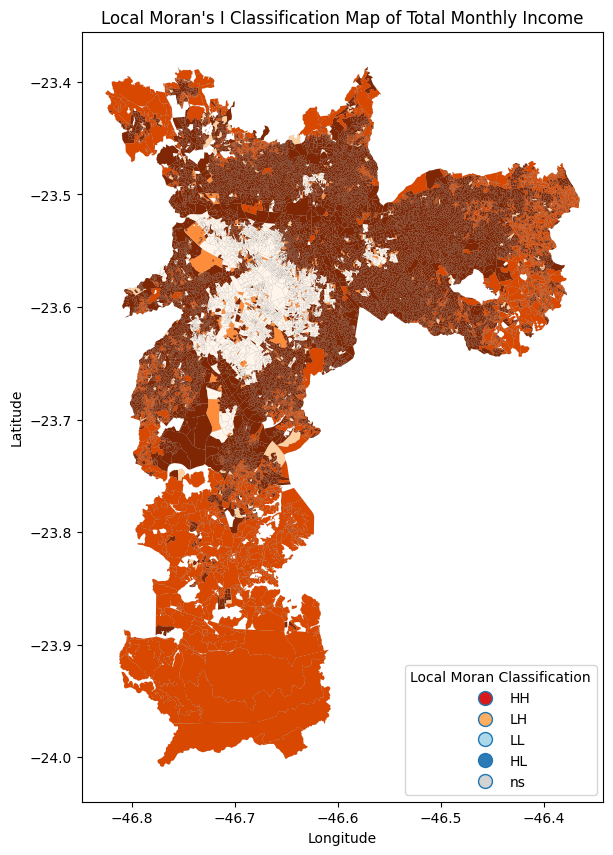

In [54]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Definisi warna untuk setiap klasifikasi
colors = {
    'HH': '#D7191C',  # Red
    'LH': '#FDAE61',  # Orange
    'LL': '#ABD9E9',  # Light Blue
    'HL': '#2C7BB6',  # Blue
    'ns': '#D3D3D3'   # Grey
}

# Plotting Local Moran's I classification map of total_monthly_income column
fig, ax = plt.subplots(figsize=(10, 10))
census_tract_sp.plot(column='total_monthly_income_local_moran', legend=True, linewidth=0.03, edgecolor='k', ax=ax, cmap='Oranges')

# Customize legend with custom colors
handles = []
for category, color in colors.items():
    patch = plt.Line2D([0], [0], linestyle='none', marker='o', markersize=10, markerfacecolor=color, label=category)
    handles.append(patch)
ax.legend(handles=handles, title='Local Moran Classification', loc='lower right')

# Add title and labels
ax.set_title("Local Moran's I Classification Map of Total Monthly Income")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()
